In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import simulate
import seaborn as sns
import calculate_return as cr
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')
plt.style.use('seaborn')
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=13)  # fontsize of the figure title

In [ ]:
spx = pd.read_csv('^GSPC.csv', index_col=0,parse_dates=True)

### Defining market to simulate

In [ ]:
start = dt.date(2020, 1, 1)
end = dt.date(2060, 1, 1)
Market = simulate.Market(spx.iloc[-7500:, -2], start, end)

Simulating data

In [14]:
garch = Market.garch(log=False)
tdist = Market.t_innovations(log=False)
draw = Market.draw(log = False, with_replacement = True, freq = 'D')
norm = Market.norm_innovations(log=False)
empirical=spx.iloc[-10437:, -2].pct_change().to_frame()

Plotting Returns

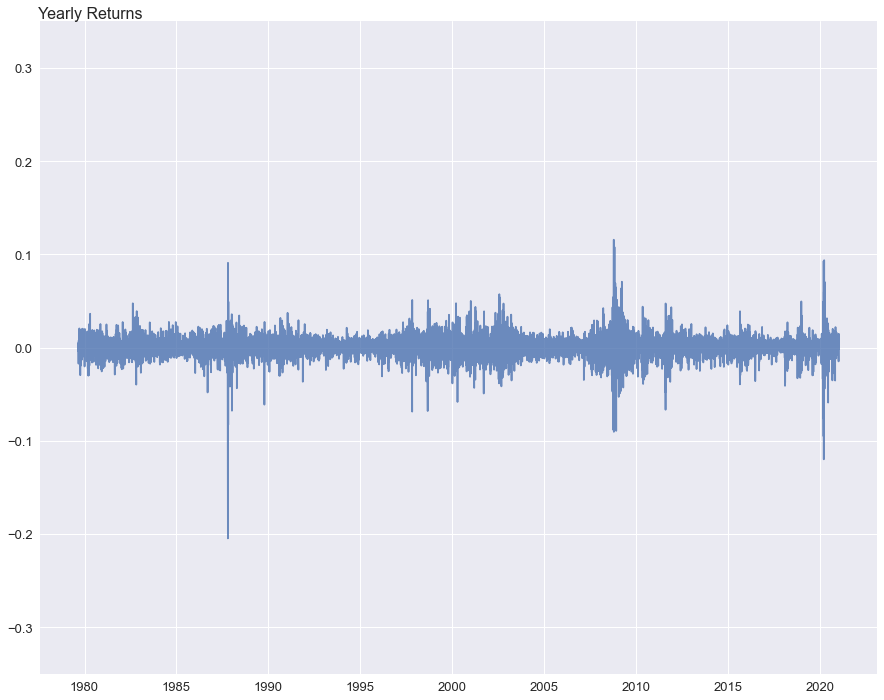

In [30]:
f, ax1= plt.subplots(1, 1, figsize=(15,12))

ax1.plot(empirical['Adj Close'], alpha=.8)
ax1.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -135)
ax1.set_ylim((-0.35,0.35))
plt.savefig("Description of data/SP500 returns.png", bbox_inches = 'tight', pad_inches = 0.1)

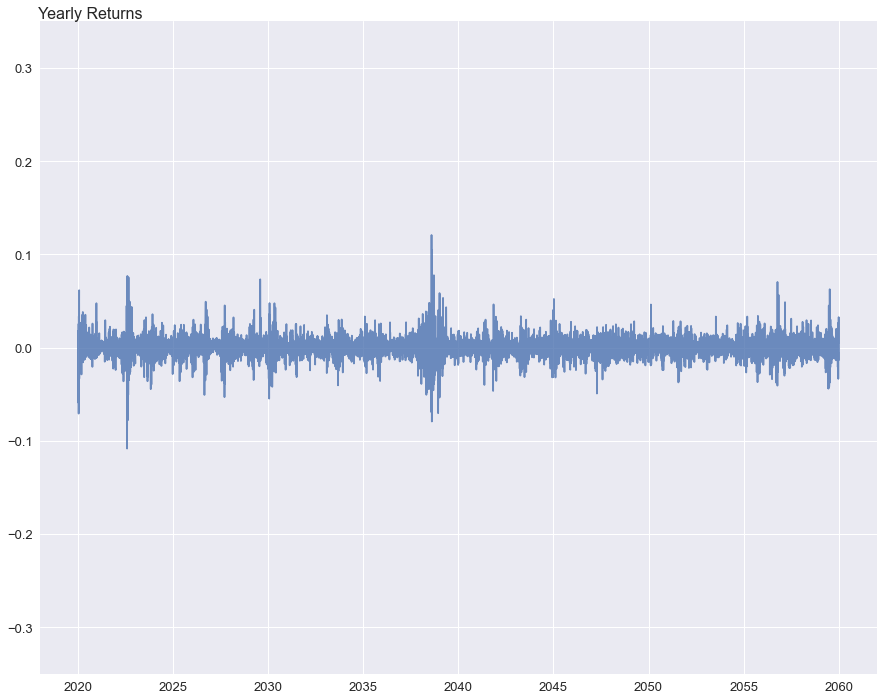

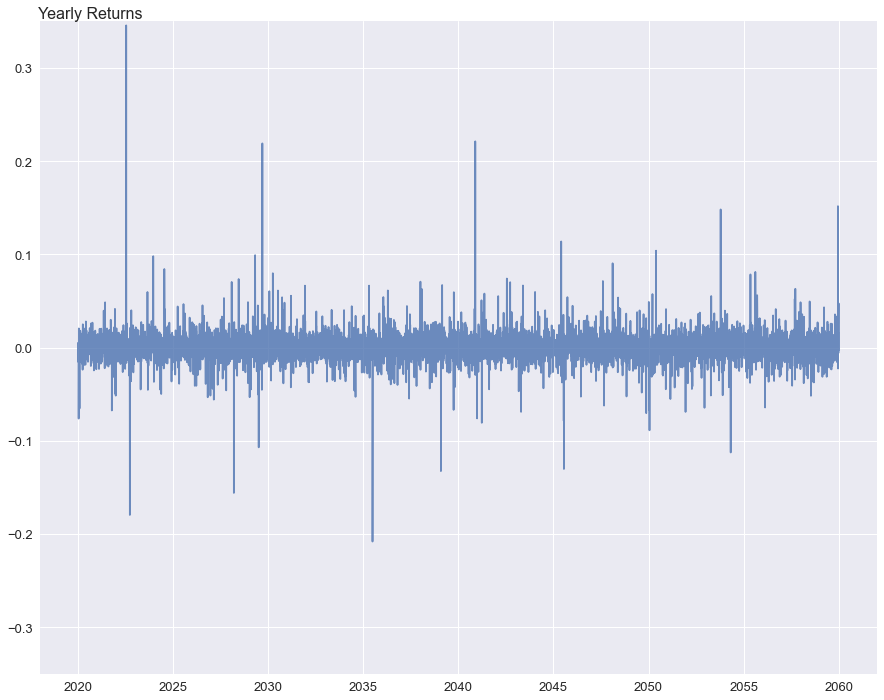

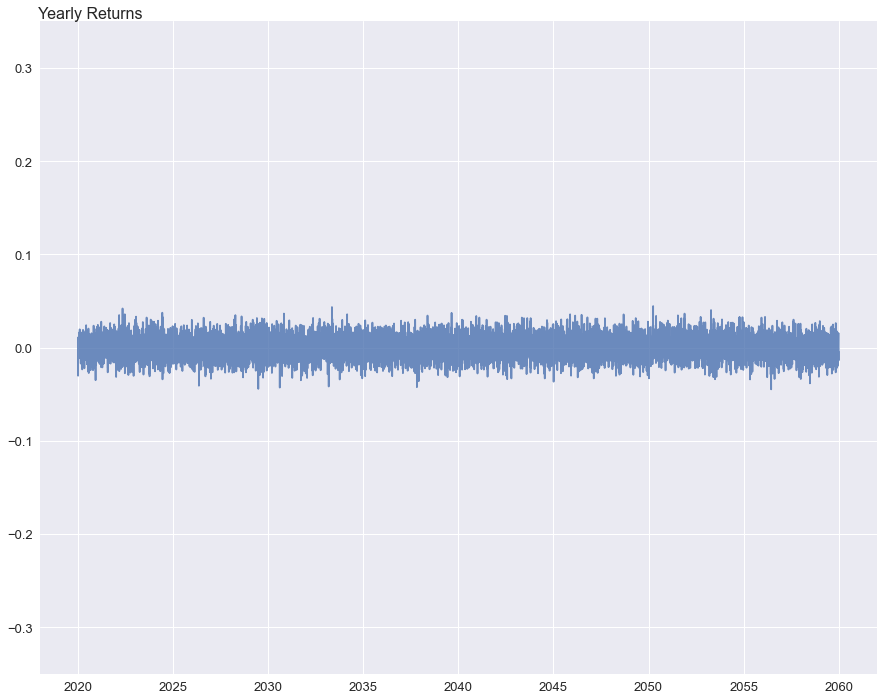

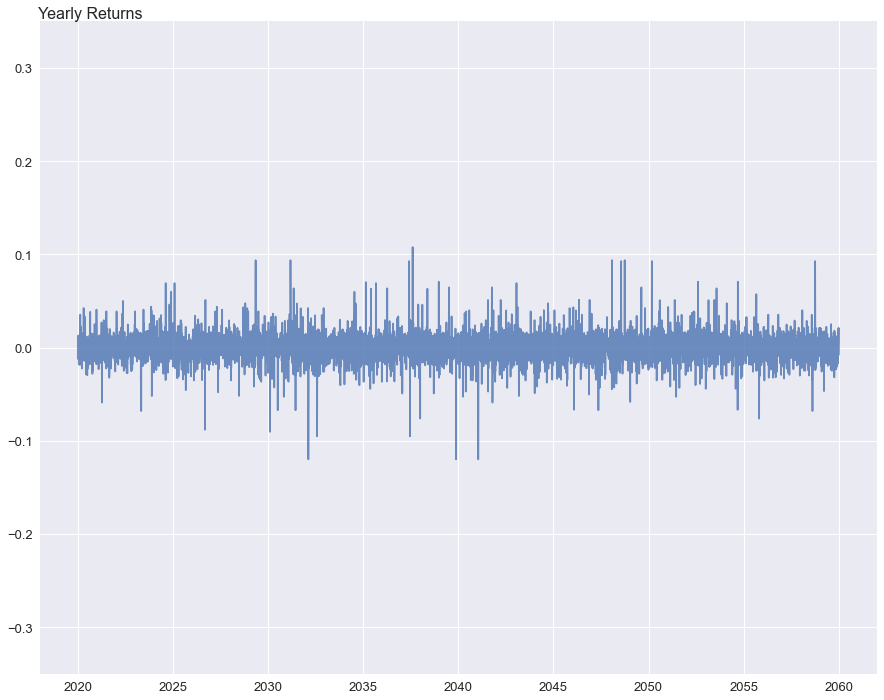

In [16]:
f, ax1 = plt.subplots(1, 1, figsize=(15,12))

ax1.plot(garch["Price"].pct_change(), alpha=.8)
ax1.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -135)
ax1.set_ylim((-0.35,0.35))
plt.savefig("Description of data/GARCH returns.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax2 = plt.subplots(1, 1, figsize=(15,12))
ax2.plot(tdist['Price'].pct_change(), alpha=.8)
ax2.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -135)
ax2.set_ylim((-0.35,0.35))
plt.savefig("Description of data/Naive t-dist.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax3 = plt.subplots(1, 1, figsize=(15,12))
ax3.plot(norm['Price'].pct_change(), alpha=.8)
ax3.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -135)
ax3.set_ylim((-0.35,0.35))
plt.savefig("Description of data/Naive Norm dist.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax4 = plt.subplots(1, 1, figsize=(15,12))
ax4.plot(draw['Price'].pct_change(), alpha=.8)
ax4.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -135)
ax4.set_ylim((-0.35,0.35))
plt.savefig("Description of data/Naive replacement.png", bbox_inches = 'tight', pad_inches = 0.1)



Plotting Histograms of returns

D:\Programmer\Anaconda\lib\site-packages\seaborn\distributions.py:952: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = self.ax.plot([], [], **plot_kws)
D:\Programmer\Anaconda\lib\site-packages\seaborn\distributions.py:995: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist, = ax.plot(support, density, **artist_kws)
D:\Programmer\Anaconda\lib\site-packages\seaborn\distributions.py:952: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = self.ax.plot([], [], **plot_kws)
D:\Programmer\Anaconda\lib\site-packages\seaborn\distributions.py:995: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist, = ax.plot(support, density, **

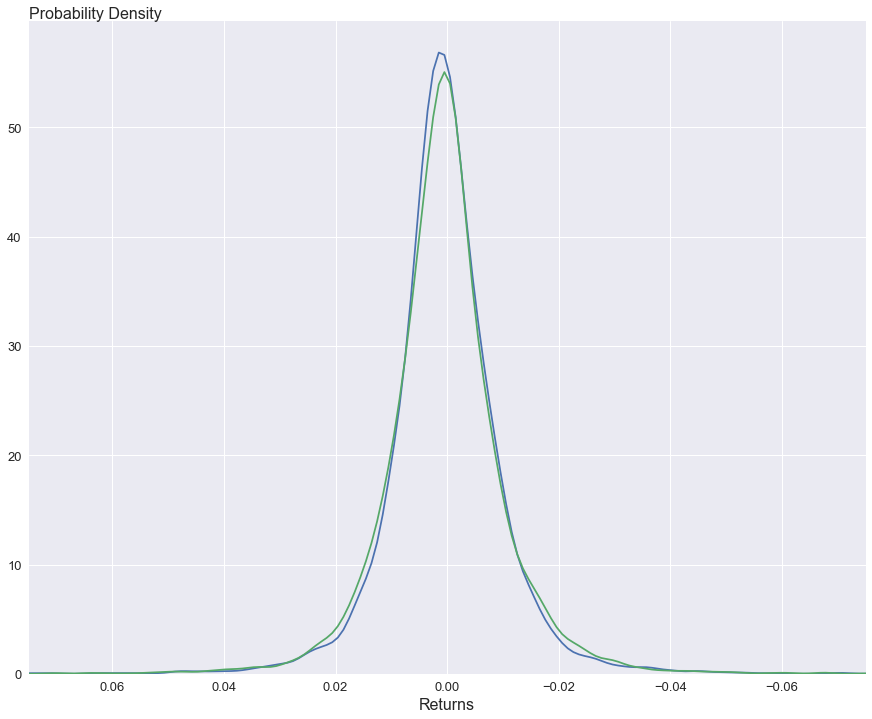

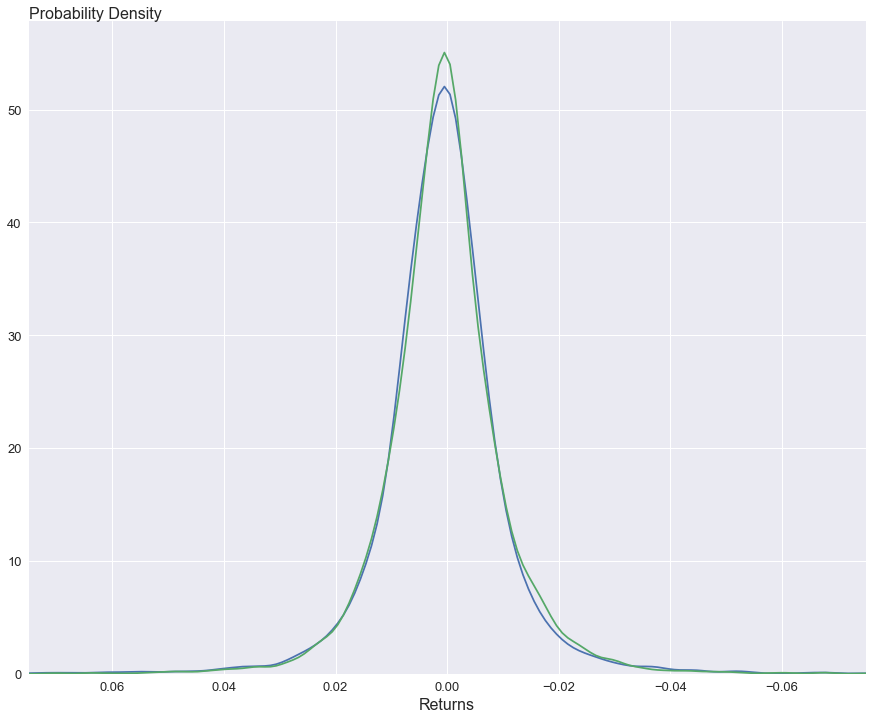

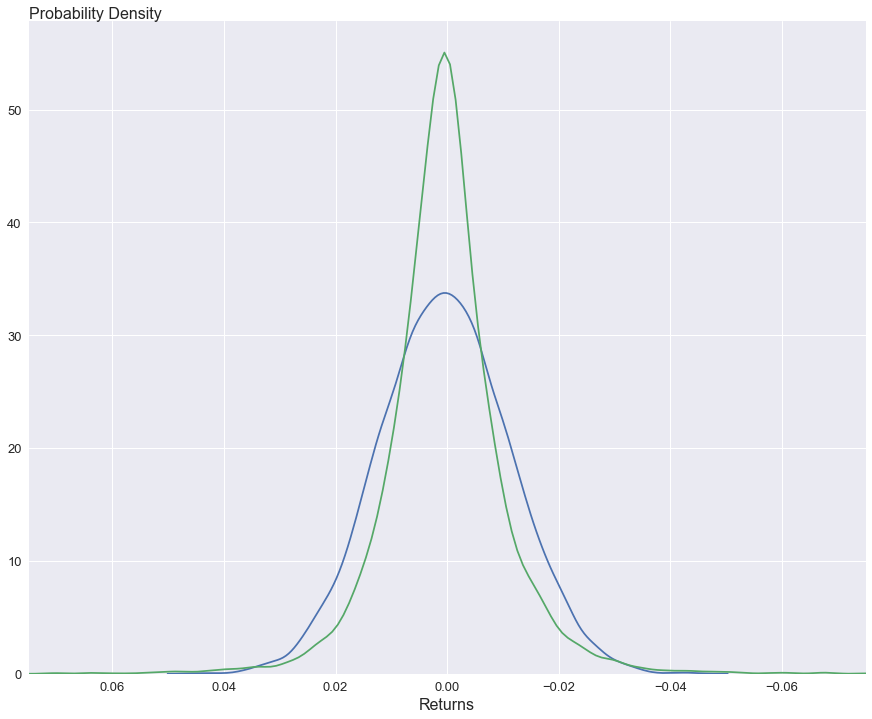

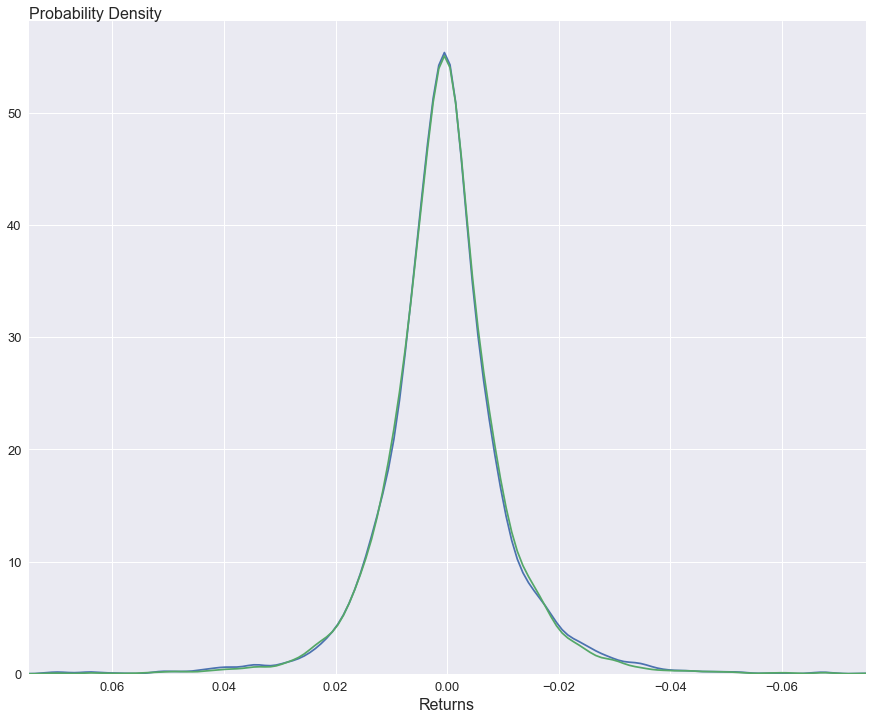

In [28]:
f, ax1 = plt.subplots(1, 1, figsize=(15,12))
sns.kdeplot(data=garch['Price'].pct_change(),clip=(-0.1, 0.1),Label='GJR-GARCH(1,1)')
sns.kdeplot(data=spx.iloc[-10437:, -2].pct_change(),clip=(-0.1, 0.1),Label='Empirical density')
plt.xlim(0.075,-0.075)
plt.xlabel('Returns') 
ax1.set_ylabel('Probability Density',loc='top', rotation = 0, labelpad = -155) 
plt.savefig("Description of data/GARCH histogram.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax2 = plt.subplots(1, 1, figsize=(15,12))
sns.kdeplot(data=tdist['Price'].pct_change(),clip=(-0.1, 0.1),Label='Skewed Students t-distribution')
sns.kdeplot(data=spx.iloc[-10437:, -2].pct_change(),clip=(-0.1, 0.1),Label='Empirical density')
plt.xlim(0.075,-0.075)
plt.xlabel('Returns') 
ax2.set_ylabel('Probability Density',loc='top', rotation = 0, labelpad = -155)
plt.savefig("Description of data/Naive t-dist histogram.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax3 = plt.subplots(1, 1, figsize=(15,12))
sns.kdeplot(data=norm['Price'].pct_change(),clip=(-0.1, 0.1),Label='Normal distribution')
sns.kdeplot(data=spx.iloc[-10437:, -2].pct_change(),clip=(-0.1, 0.1),Label='Empirical density')
plt.xlim(0.075,-0.075)
plt.xlabel('Returns') 
ax3.set_ylabel('Probability Density',loc='top', rotation = 0, labelpad = -155) 
plt.savefig("Description of data/Naive Norm Density.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax4 = plt.subplots(1, 1, figsize=(15,12))
sns.kdeplot(data=draw['Price'].pct_change(),clip=(-0.1, 0.1),Label='Draw with Replacement')
sns.kdeplot(data=spx.iloc[-10437:, -2].pct_change(),clip=(-0.1, 0.1),Label='Empirical density')
plt.xlim(0.075,-0.075)
plt.xlabel('Returns') 
ax4.set_ylabel('Probability Density',loc='top', rotation = 0, labelpad = -155) 
plt.savefig("Description of data/Naive replacement Density.png", bbox_inches = 'tight', pad_inches = 0.1)






In [ ]:
garch = Market.garch(log=False)
naive = Market.t_innovations(log=False)
draw = Market.draw(log = False, with_replacement = True, freq = 'D')
norm = Market.norm_innovations(log=False)

f, (ax1, ax2 , ax3) = plt.subplots(3, 1, figsize=(15,12))
ax1.plot(garch["Price"], alpha=.8)
ax1.plot(naive['Price'], alpha=.8)
ax1.plot(draw['Price'], alpha=.8)
ax1.plot(norm['Price'], alpha=.8)
ax1.set_title('Market')
ax1.legend(['garch', 'naive_t', 'draw with replace', 'naive_norm'])
ax1.set_yscale('log')

ax2.plot(garch["data"], alpha=.5)
ax2.plot(naive['Price'].pct_change()*100+20, alpha=.5)
ax2.plot(draw['Price'].pct_change()*100+40, alpha=.5)
ax2.plot(norm['Price'].pct_change()*100+60, alpha=.5)
ax2.set_ylim(-20, 80)
ax2.set_title('returns')
#ax2.set_yscale('LOG')

ax3.plot(garch["volatility"])
ax3.set_title('Volatility')
#ax3.set_yscale('LOG')